In [1]:
!git clone -b dev https://github.com/nyikovicsmate/thesis

Cloning into 'thesis'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (292/292), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 1711 (delta 178), reused 224 (delta 124), pack-reused 1419
Receiving objects: 100% (1711/1711), 199.11 MiB | 28.22 MiB/s, done.
Resolving deltas: 100% (667/667), done.


In [2]:
%cd thesis

/content/thesis


In [3]:
!pip3 install -q gdown
# bsd500_gray.zip
# !gdown https://drive.google.com/uc?id=1O2tduoLX1DdP3VoLkAQfuv5ssFxf8LPc
# !unzip -q bsd500_gray.zip
# bsd500_color.zip
!gdown https://drive.google.com/uc?id=1buG1ziqMjy18gnpkuQjqk81XrLsGjT7p
!unzip -q bsd500_color.zip
# set14_color.zip
!gdown https://drive.google.com/uc?id=1OiDs7jRm3NZCY6ghjyE12G5hVS0fG4EM
!unzip -q set14_color.zip

Downloading...
From: https://drive.google.com/uc?id=1buG1ziqMjy18gnpkuQjqk81XrLsGjT7p
To: /content/thesis/bsd500_color.zip
29.4MB [00:00, 93.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OiDs7jRm3NZCY6ghjyE12G5hVS0fG4EM
To: /content/thesis/set14_color.zip
100% 831k/831k [00:00<00:00, 30.9MB/s]


In [0]:
%tensorflow_version 2.x
from src.callbacks import *
from src.dataset import *
import numpy as np
import tensorflow as tf

from src.networks.adversarial.progressive_upsampling_network import AdversarialProgressiveUpsamplingNetwork

In [0]:
seed = 1111

normalize = lambda x: np.asarray(x / 255.0, dtype=np.float32)
downsample = lambda x: np.array([cv2.resize(x_i, (x.shape[2]//2, x.shape[1]//2), interpolation=cv2.INTER_CUBIC) for x_i in x])

ds = HDFDataset("bsd500_70_70_color.h5").shuffle(seed).transform()
ds_g_hr = ds.batch(40).map(normalize)
ds_g_lr = ds.batch(40).map(downsample).map(normalize)
ds_d_hr = ds.batch(40).map(normalize)
ds_d_lr = ds.batch(40).map(downsample).map(normalize)

In [6]:
network = AdversarialProgressiveUpsamplingNetwork((None, None, 3))
network.train(ds_g_lr, ds_g_hr,
              ds_d_lr, ds_d_hr,
              generator_epochs=1800,
              discriminator_epochs=1200,
              alternating_ratio=20,
              generator_lr=1e-4,
              discriminator_lr=1e-4,
              generator_callbacks=[],
              discriminator_callbacks=[])

[2020-05-21 18:05:09,453] INFO load_state(): Loaded state with: 
Train time: 06h:53m:54s
Epochs:     1630
Loss:       91843.7656
[2020-05-21 18:05:09,495] INFO load_state(): Loaded state with: 
Train time: 00h:03m:53s
Epochs:     148
Loss:       0.4277
[2020-05-21 18:05:09,497] INFO train(): Training discriminator network. [epochs 0-60 out of (1200)]
[2020-05-21 18:05:21,054] INFO _train(): Epoch: 0 train_loss: 8.00
[2020-05-21 18:05:22,799] INFO _train(): Epoch: 1 train_loss: 8.50
[2020-05-21 18:05:24,539] INFO _train(): Epoch: 2 train_loss: 4.78
[2020-05-21 18:05:26,298] INFO _train(): Epoch: 3 train_loss: 2.39
[2020-05-21 18:05:28,038] INFO _train(): Epoch: 4 train_loss: 1.25
[2020-05-21 18:05:29,760] INFO _train(): Epoch: 5 train_loss: 2.88
[2020-05-21 18:05:31,475] INFO _train(): Epoch: 6 train_loss: 2.82
[2020-05-21 18:05:33,189] INFO _train(): Epoch: 7 train_loss: 1.76
[2020-05-21 18:05:34,898] INFO _train(): Epoch: 8 train_loss: 5.01
[2020-05-21 18:05:36,650] INFO _train(): Epo

ResourceExhaustedError: ignored

[2020-05-21 19:05:12,927] WARNING save_state(): Model directory /content/thesis/checkpoints/progressiveupsamplingnetwork_ad_prog does not exist. Creating it.
[2020-05-21 19:05:12,954] INFO save_state(): Saved state.
[2020-05-21 19:05:12,956] WARNING save_state(): Model directory /content/thesis/checkpoints/discriminatornetwork_ad_prog does not exist. Creating it.
[2020-05-21 19:05:12,997] INFO save_state(): Saved state.
[2020-05-21 19:05:13,016] INFO load_state(): Loaded state with: 
Train time: 07h:33m:40s
Epochs:     2440
Loss:       106191.2969
[2020-05-21 19:05:13,044] INFO load_state(): Loaded state with: 
Train time: 00h:21m:40s
Epochs:     748
Loss:       0.0953
[2020-05-21 19:05:13,086] INFO _parse_predict_optionals(): Predicting using the default upsampling factor of 2.
[2020-05-21 19:05:13,663] INFO _predict(): Predicted images with shape: (14, 70, 70, 3)
   HR   ALIASED   NETWORK   


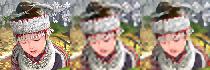

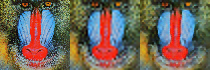

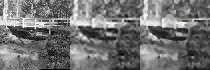

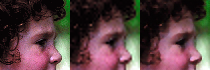

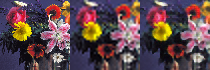

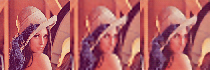

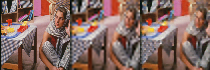

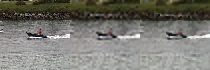

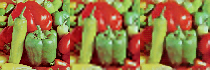

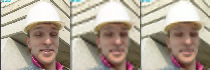

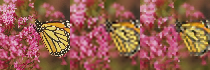

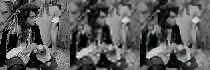

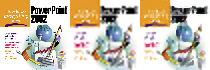

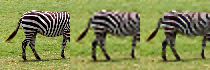

SSIM
max: [9] 0.89    min: [13] 0.59    avg: 0.71
TOTAL_VARIATION
max: [0] 1970.22    min: [3] 779.01    avg: 1473.66
PSNR
max: [3] 27.64    min: [12] 15.98    avg: 20.98
MEAN_SQUARED_ERROR
max: [12] 123.75    min: [3] 8.44    avg: 48.59
MEAN_ABSOLUTE_ERROR
max: [13] 431.66    min: [3] 137.98    avg: 305.46


In [7]:
from google.colab.patches import cv2_imshow

ds_ev_lr = DirectoryDataset("set14_70_70_color").map(downsample).map(normalize)
ds_ev_hr = DirectoryDataset("set14_70_70_color").map(normalize)

network.save_state(generator_appendix="_ad_prog", discriminator_appendix="_ad_prog")
# load best network state
network.load_state(generator_appendix="_ad_prog", discriminator_appendix="_ad_prog")

with ds_ev_lr as x, ds_ev_hr as y:
    x_batch = next(iter(x))
    y_batch = next(iter(y))
    # predict
    y_pred = network.predict(x_batch)
    print("   HR   ALIASED   NETWORK   ")
    for image_idx in range(len(x_batch)):
        aliased = tf.image.resize(x_batch[image_idx], size=tuple(y_batch[image_idx].shape[:2]), method="bicubic", antialias=True)
        img_0 = np.concatenate((y_batch[image_idx], aliased, y_pred[image_idx]), axis=1)
        cv2_imshow(img_0*255)
    # evaluate
    results = network.evaluate(y_batch, y_pred)

In [0]:
%cd checkpoints/
!zip -r progressive_adversarial.zip ./discriminatornetwork_ad_prog ./progressiveupsamplingnetwork_ad_prog
%cd ..

In [0]:
from google.colab.files import download

download("./checkpoints/progressive_adversarial.zip")